In [124]:
import datetime
import math
import numpy as np
import pandas as pd

dataset=pd.read_csv('CI_adm_dataset/INT_CI_Afluencias_LOS.csv', sep=',')
adm=pd.read_excel('CI_adm_dataset/INT_ADMISSOES.xlsx')

In [125]:
datas=[]
for x in dataset.iloc:
    e=pd.date_range(start =x['DTA_ENTRADA'], 
            end =x['DTA_SAIDA'])
    datas.append(e)
    
dataset['INTERVALO']=datas

In [127]:
teste=dataset.explode('INTERVALO')

In [130]:
dias = teste.groupby('INTERVALO')['INT_EPISODIO'].count().reset_index()

In [137]:
dias['ANO']=dias['INTERVALO'].apply(lambda x: x.year)

In [162]:
dias[dias['INTERVALO']=='2021-08-22']

,INTERVALO,INT_EPISODIO,ANO
1688,2021-08-22,8,2021


In [141]:
dias17=dias[dias['ANO']==2017]
dias18=dias[dias['ANO']==2018]
dias19=dias[dias['ANO']==2019]
dias20=dias[dias['ANO']==2020]
dias21=dias[dias['ANO']==2021]

In [140]:
dias17['INT_EPISODIO'].max()

8

In [142]:
dias18['INT_EPISODIO'].max()

8

In [163]:
dias['INT_EPISODIO'].value_counts()

5     398
6     330
4     303
3     223
7     179
2      90
8      90
9      41
1      32
10     15
11      1
Name: INT_EPISODIO, dtype: int64

In [144]:
dias20['INT_EPISODIO'].max()

10

In [145]:
dias21['INT_EPISODIO'].max()

11

In [146]:
dias17['INT_EPISODIO'].value_counts()

5    93
3    74
6    71
4    58
2    30
7    22
8     8
1     7
Name: INT_EPISODIO, dtype: int64

In [116]:
dataset[(dataset['DTA_ENTRADA']<'2018-12-02')&(dataset['DTA_SAIDA']>='2018-12-02')][['DTA_ENTRADA','DTA_SAIDA']]

,DTA_ENTRADA,DTA_SAIDA
592,2018-11-02,2018-12-03
603,2018-11-26,2018-12-03
608,2018-11-25,2018-12-03


In [99]:
dataset

,INT_EPISODIO,DTA_NASCIMENTO,SEXO,NUM_TRANSFERENCIA,COD_ESPECIALIDADE,DES_ESPECIALIDADE,MOTIVO_ENTRADA,COD_DIAGNOSTICO_ADM,DTA_ENTRADA,HORA_ENTRADA,...,NUM_SEQUENCIAL,NUM_INTERNAMENTOS,ULT_INTERNAMENTO,Tempo,NUM_INT_MESMO_DIG,ULT_INT_MESMO_DIG,Tempo_ULT_INT_MESMO_DIG,PERIODO,PERIODO_MESMO_DIG,Outlier
0,89106394680,1936-01-06,2,454127,30104,UCIP UPA (INT),T,0,2017-01-04,58200,...,2798123161,0,NaT,NaN,0,NaT,NaN,1,1,1
1,89107184342,1949-03-02,1,454217,30104,UCIP UPA (INT),T,0,2017-01-05,62160,...,1314442800,0,NaT,NaN,0,NaT,NaN,1,1,-1
2,89107429026,1967-12-19,2,456940,30104,UCIP UPA (INT),T,0,2017-02-09,45060,...,222857427,0,NaT,NaN,0,NaT,NaN,1,3,1
3,94537033718,1951-08-15,2,453801,30104,UCIP UPA (INT),U,0,2017-01-01,7920,...,1573429692,0,NaT,NaN,0,NaT,NaN,1,1,1
4,94537106011,1995-09-15,1,453814,30104,UCIP UPA (INT),U,0,2017-01-01,37920,...,1009405267,0,NaT,NaN,0,NaT,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,444995046320,1949-04-26,1,560441,30104,UCIP UPA (INT),T,0,2020-12-25,69720,...,4158910983,0,NaT,NaN,0,NaT,NaN,1,1,-1
1452,444996458814,1952-02-15,1,560492,30104,UCIP UPA (INT),T,0,2020-12-26,57780,...,1703929679,0,NaT,NaN,0,NaT,NaN,1,1,-1
1453,444997254037,1966-09-19,1,560946,30104,UCIP UPA (INT),T,0,2020-12-31,70440,...,3804024646,0,NaT,NaN,0,NaT,NaN,1,1,1
1454,444997370818,1973-04-12,2,560556,30104,UCIP UPA (INT),U,0,2020-12-27,51600,...,2375303648,0,NaT,NaN,0,NaT,NaN,1,1,1


In [147]:
trans=pd.read_excel('CI_adm_dataset/INT_TRANSFERENCIAS.xlsx')

In [153]:
ci = trans[(trans['COD_ESPECIALIDADE']==30104)&(trans['COD_ESPECIALIDADE_PREV']!=trans['COD_ESPECIALIDADE'])]

In [154]:
ci[['COD_ESPECIALIDADE_PREV','COD_ESPECIALIDADE','DTA_ENTRADA']]

,COD_ESPECIALIDADE_PREV,COD_ESPECIALIDADE,DTA_ENTRADA
65806,30125,30104,2012-07-04 00:00:00
167443,30052,30104,2016-07-29 00:00:00
238486,30051,30104,2019-04-02 00:00:00
266085,30144,30104,2020-04-18 00:00:00
306458,30064,30104,2021-08-22 00:00:00


In [19]:
trans = trans[['INT_EPISODIO','DTA_ENTRADA','COD_ESPECIALIDADE','COD_EDIFICIO', 'COD_PISO','COD_UNIDADE_INTER']]

In [20]:
dataset.columns

Index(['INT_EPISODIO', 'DTA_NASCIMENTO', 'SEXO', 'NUM_TRANSFERENCIA',
       'COD_ESPECIALIDADE', 'DES_ESPECIALIDADE', 'MOTIVO_ENTRADA',
       'COD_DIAGNOSTICO_ADM', 'DTA_ENTRADA', 'HORA_ENTRADA', 'DTA_SAIDA',
       'HORA_SAIDA', 'sequencia', 'proximo', 'des_sequencia', 'des_proximo',
       'LOS', 'IDADE', 'afluencia'],
      dtype='object')

In [21]:
adm.columns

Index(['INT_EPISODIO', 'NUM_MECANOGRAFICO', 'NUM_SEQUENCIAL',
       'DTA_INTERNAMENTO', 'HORA_INTERNAMENTO', 'TIPO_ADMISSAO',
       'COD_PROVENIENCIA', 'COD_UNID_SAUDE_PROV', 'COD_ESPECIALIDADE_PROV',
       'NUM_EPISODIO_PROV', 'COD_SUBSISTEMA_RESP', 'REINTERN', 'NUM_REINTERN',
       'NUM_TAXA', 'NUM_AVISO', 'DIAS_INT_PROV'],
      dtype='object')

In [22]:
adm=adm[['INT_EPISODIO', 'DTA_INTERNAMENTO', 'HORA_INTERNAMENTO', 'TIPO_ADMISSAO', 'COD_PROVENIENCIA']]

In [23]:
dataset1=pd.merge(dataset, adm, on='INT_EPISODIO')

In [24]:
dataset1

,INT_EPISODIO,DTA_NASCIMENTO,SEXO,NUM_TRANSFERENCIA,COD_ESPECIALIDADE,DES_ESPECIALIDADE,MOTIVO_ENTRADA,COD_DIAGNOSTICO_ADM,DTA_ENTRADA,HORA_ENTRADA,...,proximo,des_sequencia,des_proximo,LOS,IDADE,afluencia,DTA_INTERNAMENTO,HORA_INTERNAMENTO,TIPO_ADMISSAO,COD_PROVENIENCIA
0,89106394680,1936-01-06,2,454127,30104,UCIP UPA (INT),T,0,2017-01-04,58200,...,30051,CIRURGIA UPA (INT) - UCIP UPA (INT),CIRURGIA UPA (INT),436020.0,86,5,2016-12-27 00:00:00,32400,P,2
1,89107184342,1949-03-02,1,454217,30104,UCIP UPA (INT),T,0,2017-01-05,62160,...,30125,MEDICINA INTERNA UPA (INT) - UCIP UPA (INT),UCIPSU UPA (INT),1712820.0,73,5,2016-12-29 00:00:00,11160,U,1
2,89107429026,1967-12-19,2,456940,30104,UCIP UPA (INT),T,0,2017-02-09,45060,...,30051,CIRURGIA UPA (INT) - UCIP UPA (INT),CIRURGIA UPA (INT),174300.0,54,4,2016-12-29 00:00:00,54787,P,2
3,94537033718,1951-08-15,2,453801,30104,UCIP UPA (INT),U,0,2017-01-01,7920,...,30062,UCIP UPA (INT),MEDICINA INTERNA UPA (INT),469140.0,70,0,2017-01-01 00:00:00,7920,U,1
4,94537106011,1995-09-15,1,453814,30104,UCIP UPA (INT),U,0,2017-01-01,37920,...,30062,UCIP UPA (INT),MEDICINA INTERNA UPA (INT),109020.0,26,1,2017-01-01 00:00:00,37920,U,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,444995046320,1949-04-26,1,560441,30104,UCIP UPA (INT),T,0,2020-12-25,69720,...,0,MEDICINA INTERNA UPA (INT) - UCIPSU 2 UPA (INT...,ALTA,1468680.0,72,4,2020-12-20 00:00:00,9900,U,1
1452,444996458814,1952-02-15,1,560492,30104,UCIP UPA (INT),T,0,2020-12-26,57780,...,30062,UCIPSU 2 UPA (INT) - UCIP UPA (INT),MEDICINA INTERNA UPA (INT),2947260.0,70,4,2020-12-23 00:00:00,74760,U,1
1453,444997254037,1966-09-19,1,560946,30104,UCIP UPA (INT),T,0,2020-12-31,70440,...,30062,MEDICINA INTERNA UPA (INT) - UCIP UPA (INT),MEDICINA INTERNA UPA (INT),520560.0,55,4,2020-12-27 00:00:00,840,U,1
1454,444997370818,1973-04-12,2,560556,30104,UCIP UPA (INT),U,0,2020-12-27,51600,...,0,UCIP UPA (INT),ALTA,52980.0,48,5,2020-12-27 00:00:00,51600,U,1


In [25]:
dataset1.dtypes

INT_EPISODIO             int64
DTA_NASCIMENTO          object
SEXO                     int64
NUM_TRANSFERENCIA        int64
COD_ESPECIALIDADE        int64
DES_ESPECIALIDADE       object
MOTIVO_ENTRADA          object
COD_DIAGNOSTICO_ADM     object
DTA_ENTRADA             object
HORA_ENTRADA             int64
DTA_SAIDA               object
HORA_SAIDA             float64
sequencia               object
proximo                  int64
des_sequencia           object
des_proximo             object
LOS                    float64
IDADE                    int64
afluencia                int64
DTA_INTERNAMENTO        object
HORA_INTERNAMENTO        int64
TIPO_ADMISSAO           object
COD_PROVENIENCIA         int64
dtype: object

In [26]:
dataset1['HORAS_INT']=dataset1['HORA_ENTRADA']-dataset1['HORA_INTERNAMENTO']
dataset1['DTA_ENTRADA'] = pd.to_datetime(dataset1['DTA_ENTRADA'])
dataset1['DTA_INTERNAMENTO'] = pd.to_datetime(dataset1['DTA_INTERNAMENTO'])
dataset1['DIAS_INT']=dataset1['DTA_ENTRADA']-dataset1['DTA_INTERNAMENTO']
dataset1['DIAS_INT']=dataset1['DIAS_INT'].dt.total_seconds()
dataset1['LOS_ANTERIOR']=dataset1['DIAS_INT']+dataset1['HORAS_INT']

In [27]:
dataset1

,INT_EPISODIO,DTA_NASCIMENTO,SEXO,NUM_TRANSFERENCIA,COD_ESPECIALIDADE,DES_ESPECIALIDADE,MOTIVO_ENTRADA,COD_DIAGNOSTICO_ADM,DTA_ENTRADA,HORA_ENTRADA,...,LOS,IDADE,afluencia,DTA_INTERNAMENTO,HORA_INTERNAMENTO,TIPO_ADMISSAO,COD_PROVENIENCIA,HORAS_INT,DIAS_INT,LOS_ANTERIOR
0,89106394680,1936-01-06,2,454127,30104,UCIP UPA (INT),T,0,2017-01-04,58200,...,436020.0,86,5,2016-12-27,32400,P,2,25800,691200.0,717000.0
1,89107184342,1949-03-02,1,454217,30104,UCIP UPA (INT),T,0,2017-01-05,62160,...,1712820.0,73,5,2016-12-29,11160,U,1,51000,604800.0,655800.0
2,89107429026,1967-12-19,2,456940,30104,UCIP UPA (INT),T,0,2017-02-09,45060,...,174300.0,54,4,2016-12-29,54787,P,2,-9727,3628800.0,3619073.0
3,94537033718,1951-08-15,2,453801,30104,UCIP UPA (INT),U,0,2017-01-01,7920,...,469140.0,70,0,2017-01-01,7920,U,1,0,0.0,0.0
4,94537106011,1995-09-15,1,453814,30104,UCIP UPA (INT),U,0,2017-01-01,37920,...,109020.0,26,1,2017-01-01,37920,U,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,444995046320,1949-04-26,1,560441,30104,UCIP UPA (INT),T,0,2020-12-25,69720,...,1468680.0,72,4,2020-12-20,9900,U,1,59820,432000.0,491820.0
1452,444996458814,1952-02-15,1,560492,30104,UCIP UPA (INT),T,0,2020-12-26,57780,...,2947260.0,70,4,2020-12-23,74760,U,1,-16980,259200.0,242220.0
1453,444997254037,1966-09-19,1,560946,30104,UCIP UPA (INT),T,0,2020-12-31,70440,...,520560.0,55,4,2020-12-27,840,U,1,69600,345600.0,415200.0
1454,444997370818,1973-04-12,2,560556,30104,UCIP UPA (INT),U,0,2020-12-27,51600,...,52980.0,48,5,2020-12-27,51600,U,1,0,0.0,0.0


In [28]:
doentes=pd.read_excel('CI_adm_dataset/ide_doentes.xlsx')
doentes=doentes[['INT_EPISODIO','NUM_SEQUENCIAL']]

In [29]:
dataset=pd.merge(dataset1, doentes, on='INT_EPISODIO')

In [30]:
#dataset['DTA_ENTRADA'] = pd.to_datetime(dataset['DTA_ENTRADA'])
dataset['DTA_SAIDA'] = pd.to_datetime(dataset['DTA_SAIDA'])

In [31]:
num_int=[]
ult=[]
for x in dataset.iloc:
    z=dataset[(dataset['NUM_SEQUENCIAL']==x['NUM_SEQUENCIAL'])&(dataset['DTA_ENTRADA']<x['DTA_ENTRADA'])]
    t=len(z)
    ult_int=z['DTA_SAIDA'].max()
    num_int.append(t)
    ult.append(ult_int)
    
dataset['NUM_INTERNAMENTOS']=num_int
dataset['ULT_INTERNAMENTO']=ult

In [32]:
dataset['ULT_INTERNAMENTO'] = pd.to_datetime(dataset['ULT_INTERNAMENTO'])
dataset['Tempo']=dataset['DTA_ENTRADA']-dataset['ULT_INTERNAMENTO']

In [33]:
num_int=[]
ult=[]
for x in dataset.iloc:
    z=dataset[(dataset['NUM_SEQUENCIAL']==x['NUM_SEQUENCIAL'])&(dataset['DTA_ENTRADA']<x['DTA_ENTRADA'])&(dataset['COD_DIAGNOSTICO_ADM']==x['COD_DIAGNOSTICO_ADM'])&(x['COD_DIAGNOSTICO_ADM']!='0')]
    t=len(z)
    ult_int=z['DTA_SAIDA'].max()
    num_int.append(t)
    ult.append(ult_int)
    
dataset['NUM_INT_MESMO_DIG']=num_int
dataset['ULT_INT_MESMO_DIG']=ult

In [34]:
dataset['ULT_INT_MESMO_DIG'] = pd.to_datetime(dataset['ULT_INT_MESMO_DIG'])
dataset['Tempo_ULT_INT_MESMO_DIG']=dataset['DTA_ENTRADA']-dataset['ULT_INT_MESMO_DIG']

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   INT_EPISODIO             1456 non-null   int64          
 1   DTA_NASCIMENTO           1456 non-null   object         
 2   SEXO                     1456 non-null   int64          
 3   NUM_TRANSFERENCIA        1456 non-null   int64          
 4   COD_ESPECIALIDADE        1456 non-null   int64          
 5   DES_ESPECIALIDADE        1456 non-null   object         
 6   MOTIVO_ENTRADA           1456 non-null   object         
 7   COD_DIAGNOSTICO_ADM      1456 non-null   object         
 8   DTA_ENTRADA              1456 non-null   datetime64[ns] 
 9   HORA_ENTRADA             1456 non-null   int64          
 10  DTA_SAIDA                1456 non-null   datetime64[ns] 
 11  HORA_SAIDA               1456 non-null   float64        
 12  sequencia           

In [36]:
dataset['Tempo']=dataset['Tempo'].apply(lambda x: x.total_seconds())

In [37]:
periodo=[]

for x in dataset.iloc:
    if x[22]<=2592000:
        periodo.append('1')
    else:
        if x[22]<=7776000:
            periodo.append('3')
        else:
            if x[22]<=15552000:
                periodo.append('6')
            else:
                if x[22]<=31104000:
                    periodo.append('12')
                else:
                    periodo.append('0')


dataset['PERIODO']=periodo
dataset['PERIODO']=dataset['PERIODO'].astype(int)

In [38]:
dataset['Tempo_ULT_INT_MESMO_DIG']=dataset['Tempo_ULT_INT_MESMO_DIG'].apply(lambda x: x.total_seconds())

In [39]:
periodo=[]

for x in dataset.iloc:
    if x[25]<=2592000:
        periodo.append('1')
    else:
        if x[25]<=7776000:
            periodo.append('3')
        else:
            if x[25]<=15552000:
                periodo.append('6')
            else:
                if x[25]<=31104000:
                    periodo.append('12')
                else:
                    periodo.append('0')


dataset['PERIODO_MESMO_DIG']=periodo
dataset['PERIODO_MESMO_DIG']=dataset['PERIODO_MESMO_DIG'].astype(int)

In [40]:
dataset=dataset[dataset.LOS.notnull()]
h=dataset['LOS']

In [41]:
from sklearn.ensemble import IsolationForest
h=h.values.reshape(-1,1)
clf = IsolationForest(random_state=0).fit(h)

In [42]:
dataset['Outlier']=clf.predict(h)

In [43]:
dataset['Outlier'].value_counts()

 1    1198
-1     258
Name: Outlier, dtype: int64

In [44]:
dataset[dataset['Outlier']==1]['LOS'].min()/3600

13.816666666666666

In [45]:
dataset[dataset['Outlier']==1]['LOS'].max()/3600

215.96666666666667

In [46]:
final=dataset[dataset['Outlier']==1]

In [47]:
final['LOS'].min()

49740.0

In [48]:
q1=np.percentile(final.LOS, 25)
q3=np.percentile(final.LOS, 75)
med_quartil=final[(final['LOS']>=q1)&(final['LOS']<=q3)]['LOS'].mean()
med=final['LOS'].mean()

In [49]:
q1

100095.0

In [50]:
med_quartil

213324.79598662208

In [51]:
med/3600/24

3.069966050670871

In [52]:
classe_quartil=med_quartil+med_quartil*0.3
classe_med=med+med*0.3

In [53]:
classe_quartil

277322.2347826087

In [54]:
classe_med/3600/24

3.9909558658721322

In [55]:
import math
def arrendondar(t):
    return math.ceil(t/3600/24)
final['LOS Dia']=final['LOS'].apply(arrendondar)

/tmp/ipykernel_1447/2953206274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['LOS Dia']=final['LOS'].apply(arrendondar)


In [56]:
final['LOS Anterior Dia']=final['LOS_ANTERIOR'].apply(arrendondar)

/tmp/ipykernel_1447/1688264652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['LOS Anterior Dia']=final['LOS_ANTERIOR'].apply(arrendondar)


In [57]:
final

,INT_EPISODIO,DTA_NASCIMENTO,SEXO,NUM_TRANSFERENCIA,COD_ESPECIALIDADE,DES_ESPECIALIDADE,MOTIVO_ENTRADA,COD_DIAGNOSTICO_ADM,DTA_ENTRADA,HORA_ENTRADA,...,ULT_INTERNAMENTO,Tempo,NUM_INT_MESMO_DIG,ULT_INT_MESMO_DIG,Tempo_ULT_INT_MESMO_DIG,PERIODO,PERIODO_MESMO_DIG,Outlier,LOS Dia,LOS Anterior Dia
0,89106394680,1936-01-06,2,454127,30104,UCIP UPA (INT),T,0,2017-01-04,58200,...,NaT,NaN,0,NaT,NaN,1,1,1,6,9
2,89107429026,1967-12-19,2,456940,30104,UCIP UPA (INT),T,0,2017-02-09,45060,...,NaT,NaN,0,NaT,NaN,1,3,1,3,42
3,94537033718,1951-08-15,2,453801,30104,UCIP UPA (INT),U,0,2017-01-01,7920,...,NaT,NaN,0,NaT,NaN,1,1,1,6,0
4,94537106011,1995-09-15,1,453814,30104,UCIP UPA (INT),U,0,2017-01-01,37920,...,NaT,NaN,0,NaT,NaN,1,1,1,2,0
5,94538145918,1991-06-22,2,454118,30104,UCIP UPA (INT),T,0,2017-01-04,47880,...,NaT,NaN,0,NaT,NaN,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,444991120254,1974-05-11,2,558993,30104,UCIP UPA (INT),T,0,2020-12-09,45780,...,NaT,NaN,0,NaT,NaN,1,1,1,3,2
1450,444994234414,1961-05-03,1,559873,30104,UCIP UPA (INT),T,0,2020-12-18,84240,...,NaT,NaN,0,NaT,NaN,1,1,1,5,2
1453,444997254037,1966-09-19,1,560946,30104,UCIP UPA (INT),T,0,2020-12-31,70440,...,NaT,NaN,0,NaT,NaN,1,1,1,7,5
1454,444997370818,1973-04-12,2,560556,30104,UCIP UPA (INT),U,0,2020-12-27,51600,...,NaT,NaN,0,NaT,NaN,1,1,1,1,0


In [58]:
final[['LOS_ANTERIOR','LOS Anterior Dia']]

,LOS_ANTERIOR,LOS Anterior Dia
0,717000.0,9
2,3619073.0,42
3,0.0,0
4,0.0,0
5,94705.0,2
...,...,...
1448,124560.0,2
1450,141360.0,2
1453,415200.0,5
1454,0.0,0


<AxesSubplot:ylabel='Frequency'>

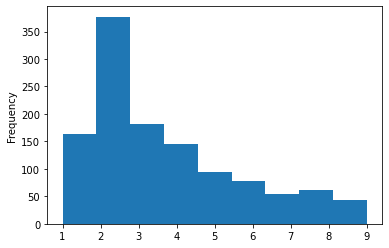

In [59]:
final['LOS Dia'].plot.hist(bins=9, alpha=1)

In [60]:
final['LOS Dia'].value_counts()

2    377
3    181
1    163
4    145
5     94
6     78
8     62
7     54
9     44
Name: LOS Dia, dtype: int64

In [61]:
def cl_med(m):
    if m > classe_med:
        return 1
    else:
        return 0
final['Classe Media']=final['LOS'].apply(cl_med)

def cl_quartil(m):
    if m > classe_quartil:
        return 1
    else:
        return 0
final['Classe Quartil']=final['LOS'].apply(cl_quartil)

/tmp/ipykernel_1447/2557268889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Classe Media']=final['LOS'].apply(cl_med)
/tmp/ipykernel_1447/2557268889.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Classe Quartil']=final['LOS'].apply(cl_quartil)


In [62]:
final.columns

Index(['INT_EPISODIO', 'DTA_NASCIMENTO', 'SEXO', 'NUM_TRANSFERENCIA',
       'COD_ESPECIALIDADE', 'DES_ESPECIALIDADE', 'MOTIVO_ENTRADA',
       'COD_DIAGNOSTICO_ADM', 'DTA_ENTRADA', 'HORA_ENTRADA', 'DTA_SAIDA',
       'HORA_SAIDA', 'sequencia', 'proximo', 'des_sequencia', 'des_proximo',
       'LOS', 'IDADE', 'afluencia', 'DTA_INTERNAMENTO', 'HORA_INTERNAMENTO',
       'TIPO_ADMISSAO', 'COD_PROVENIENCIA', 'HORAS_INT', 'DIAS_INT',
       'LOS_ANTERIOR', 'NUM_SEQUENCIAL', 'NUM_INTERNAMENTOS',
       'ULT_INTERNAMENTO', 'Tempo', 'NUM_INT_MESMO_DIG', 'ULT_INT_MESMO_DIG',
       'Tempo_ULT_INT_MESMO_DIG', 'PERIODO', 'PERIODO_MESMO_DIG', 'Outlier',
       'LOS Dia', 'LOS Anterior Dia', 'Classe Media', 'Classe Quartil'],
      dtype='object')

In [63]:
mot=[]
for x in final.iloc:
    if x[5]=='U':
        mot.append('1')
    else:
        if x[5]=='T':
            mot.append('2')
        else:
            mot.append('3')
final['MOTIVO']=mot

s = final['sequencia'].unique()
contador = 0
id_seq = []

for y in range(final['sequencia'].nunique()):
    contador = contador + 1
    id_seq.append(contador)
    y = y + 1
seq_id=pd.DataFrame({'sequencia':s, 'ID_SEQ':id_seq})
final = pd.merge(final, seq_id, on = 'sequencia', how='left')

d_s = final['COD_DIAGNOSTICO_ADM'].unique()
contador = 0
id_dig = []

for y in range(final['COD_DIAGNOSTICO_ADM'].nunique()):
    contador = contador + 1
    id_dig.append(contador)
    y = y + 1
    
seq_dig=pd.DataFrame({'COD_DIAGNOSTICO_ADM':d_s, 'ID_DIG':id_dig})
final = pd.merge(final, seq_dig, on = 'COD_DIAGNOSTICO_ADM', how='left')

/tmp/ipykernel_1447/3879122329.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['MOTIVO']=mot


In [64]:
final.columns

Index(['INT_EPISODIO', 'DTA_NASCIMENTO', 'SEXO', 'NUM_TRANSFERENCIA',
       'COD_ESPECIALIDADE', 'DES_ESPECIALIDADE', 'MOTIVO_ENTRADA',
       'COD_DIAGNOSTICO_ADM', 'DTA_ENTRADA', 'HORA_ENTRADA', 'DTA_SAIDA',
       'HORA_SAIDA', 'sequencia', 'proximo', 'des_sequencia', 'des_proximo',
       'LOS', 'IDADE', 'afluencia', 'DTA_INTERNAMENTO', 'HORA_INTERNAMENTO',
       'TIPO_ADMISSAO', 'COD_PROVENIENCIA', 'HORAS_INT', 'DIAS_INT',
       'LOS_ANTERIOR', 'NUM_SEQUENCIAL', 'NUM_INTERNAMENTOS',
       'ULT_INTERNAMENTO', 'Tempo', 'NUM_INT_MESMO_DIG', 'ULT_INT_MESMO_DIG',
       'Tempo_ULT_INT_MESMO_DIG', 'PERIODO', 'PERIODO_MESMO_DIG', 'Outlier',
       'LOS Dia', 'LOS Anterior Dia', 'Classe Media', 'Classe Quartil',
       'MOTIVO', 'ID_SEQ', 'ID_DIG'],
      dtype='object')

In [231]:
def classe_target(x):
    if x <=3:
        return 1
    else:
        return x

final['Classe_LOS_RES']=final['LOS Dia'].apply(classe_target)

In [254]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 1197
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INT_EPISODIO             1198 non-null   int64         
 1   DTA_NASCIMENTO           1198 non-null   object        
 2   SEXO                     1198 non-null   int64         
 3   NUM_TRANSFERENCIA        1198 non-null   int64         
 4   COD_ESPECIALIDADE        1198 non-null   int64         
 5   DES_ESPECIALIDADE        1198 non-null   object        
 6   MOTIVO_ENTRADA           1198 non-null   object        
 7   COD_DIAGNOSTICO_ADM      1198 non-null   object        
 8   DTA_ENTRADA              1198 non-null   datetime64[ns]
 9   HORA_ENTRADA             1198 non-null   int64         
 10  DTA_SAIDA                1198 non-null   datetime64[ns]
 11  HORA_SAIDA               1198 non-null   float64       
 12  sequencia                1198 non-

In [256]:
final['NUM_ESP_ANTERIORES']=final['sequencia'].apply(lambda x: len(x)/5-1)

In [269]:
#classificação
X = final[['NUM_ESP_ANTERIORES','IDADE','afluencia','ID_DIG','SEXO','NUM_INTERNAMENTOS','LOS_ANTERIOR','COD_PROVENIENCIA','TIPO_ADMISSAO']]
y_med = final['Classe_LOS_RES']

In [270]:
from collections import defaultdict
temp = defaultdict(lambda: len(temp))
X['TIPO_ADMISSAO'] = [temp[ele] for ele in X['TIPO_ADMISSAO']]

/tmp/ipykernel_1447/1145628292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TIPO_ADMISSAO'] = [temp[ele] for ele in X['TIPO_ADMISSAO']]


In [271]:
X=X.replace(np.nan,0)

In [272]:
X_med=X
X_quartil=X

In [273]:
from imblearn.over_sampling import RandomOverSampler 
over_sampler = RandomOverSampler() 
X_med, y_med = over_sampler.fit_resample(X_med, y_med) 

In [274]:
y_med.value_counts()

6    721
1    721
4    721
5    721
9    721
8    721
7    721
Name: Classe_LOS_RES, dtype: int64

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from numpy import mean
from numpy import absolute
from numpy import sqrt
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import recall_score

# CLASSIFICAÇÃO

In [276]:
model1= DecisionTreeClassifier(max_depth=45, random_state=42)
model2 = RandomForestClassifier(max_depth=45,random_state=42)
model3= GradientBoostingClassifier(max_depth=45,random_state=42)
model4= KNeighborsClassifier()

In [277]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [278]:
from sklearn.model_selection import cross_val_predict

predicted1 = cross_val_predict(model1, X_med, y_med, cv=cv)

In [279]:
predicted2 = cross_val_predict(model2, X_med, y_med, cv=cv)

In [280]:
predicted3 = cross_val_predict(model3, X_med, y_med, cv=cv)

In [281]:
predicted4 = cross_val_predict(model4, X_med, y_med, cv=cv)

In [267]:
accuracy_score(y_med, predicted1)

0.9084604715672677

In [282]:
accuracy_score(y_med, predicted2)

0.9165841093719042

In [283]:
accuracy_score(y_med, predicted3)

0.9191598969684961

In [284]:
accuracy_score(y_med, predicted4)

0.829205468595205

In [285]:
cohen_kappa_score(y_med, predicted1)

0.8871937124364309

In [286]:
cohen_kappa_score(y_med, predicted2)

0.9026814609338881

In [287]:
cohen_kappa_score(y_med, predicted3)

0.9056865464632455

In [288]:
cohen_kappa_score(y_med, predicted4)

0.8007397133610725

In [289]:
f1_score(y_med, predicted1, average='macro')

0.8984088674516174

In [290]:
f1_score(y_med, predicted2, average='macro')

0.9137648267720121

In [291]:
f1_score(y_med, predicted3, average='macro')

0.9169553783256957

In [292]:
f1_score(y_med, predicted4, average='macro')

0.8113985225214418

In [293]:
precision_score(y_med, predicted1, average='macro')

0.9078381653945107

In [294]:
precision_score(y_med, predicted2, average='macro')

0.9202021606448089

In [295]:
precision_score(y_med, predicted3, average='macro')

0.9220828311154051

In [296]:
precision_score(y_med, predicted4, average='macro')

0.8323616956608896

In [297]:
recall_score(y_med, predicted1, average='macro')

0.9033088963740836

In [298]:
recall_score(y_med, predicted2, average='macro')

0.916584109371904

In [299]:
recall_score(y_med, predicted4, average='macro')

0.829205468595205

In [300]:
recall_score(y_med, predicted3, average='macro')

0.9191598969684962

In [301]:
model1.fit(X_med,y_med)

DecisionTreeClassifier(max_depth=45, random_state=42)

In [302]:
model2.fit(X_med,y_med)

RandomForestClassifier(max_depth=45, random_state=42)

In [303]:
model3.fit(X_med,y_med)

GradientBoostingClassifier(max_depth=45, random_state=42)

In [304]:
model4.fit(X_med,y_med)

KNeighborsClassifier()

In [305]:
predictions1 = model1.predict_proba(X_med)
print(predictions)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.26315789 0.57894737]]


In [306]:
roc_auc_score(y_med, predictions1, multi_class='ovr')

0.9994161218343228

In [307]:
predictions2= model2.predict_proba(X_med)

predictions3 = model3.predict_proba(X_med)

predictions4 = model4.predict_proba(X_med)



In [308]:
roc_auc_score(y_med, predictions2, multi_class='ovr')

0.9993809462435446

In [309]:
roc_auc_score(y_med, predictions3, multi_class='ovr')

0.9994161218343228

In [310]:
roc_auc_score(y_med, predictions4, multi_class='ovr')

0.9951130661655609

# PROBABILIDADE

In [58]:
model = RandomForestClassifier(max_depth=27,random_state=42)
classifier = model.fit(X_med,y_med)
predictions = classifier.predict_proba(X_med)
print(predictions)

[[0.9        0.1       ]
 [0.83       0.17      ]
 [0.92       0.08      ]
 ...
 [0.0655495  0.9344505 ]
 [0.         1.        ]
 [0.49173738 0.50826262]]


In [59]:
testar=X_med

In [60]:
predict=cross_val_predict(model, X_med, y_med, cv=cv)
testar['predict']=predict
testar['real']=y_med

In [61]:
prob_0=[]
prob_1=[]

for d in predictions:
    prob_0.append(d[0])
    prob_1.append(d[1])
testar['probabilidade0']=prob_0
testar['probabilidade1']=prob_1

In [62]:
testar

,ID_SEQ,IDADE,afluencia,ID_DIG,MOTIVO,SEXO,NUM_INTERNAMENTOS,PERIODO,NUM_INT_MESMO_DIG,PERIODO_MESMO_DIG,LOS_ANTERIOR,predict,real,probabilidade0,probabilidade1
0,1,84,20,1,3,2,0,1,0,1,766380.0,0,0,0.900000,0.100000
1,2,90,60,1,3,2,0,1,0,1,795960.0,0,0,0.830000,0.170000
2,2,62,7,1,3,2,0,1,0,1,325440.0,0,0,0.920000,0.080000
3,3,55,105,1,3,2,0,1,0,3,5482739.0,0,1,0.220000,0.780000
4,2,63,73,2,3,1,0,1,0,1,763560.0,0,0,0.940000,0.060000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25163,5,90,112,1,3,2,0,1,0,1,0.0,1,1,0.393258,0.606742
25164,5,66,111,1,3,1,0,1,0,1,0.0,1,1,0.323251,0.676749
25165,5,93,118,17,3,1,0,1,0,1,0.0,1,1,0.065549,0.934451
25166,63,66,68,1,3,1,1,1,0,1,1885991.0,1,1,0.000000,1.000000


In [66]:
testar[testar['predict']!=testar['real']]

,ID_SEQ,IDADE,afluencia,ID_DIG,MOTIVO,SEXO,NUM_INTERNAMENTOS,PERIODO,NUM_INT_MESMO_DIG,PERIODO_MESMO_DIG,LOS_ANTERIOR,predict,real,probabilidade0,probabilidade1
3,3,55,105,1,3,2,0,1,0,3,5482739.0,0,1,0.220000,0.780000
8,2,68,58,1,3,2,0,1,0,1,320580.0,1,0,0.840000,0.160000
11,5,80,2,1,3,2,0,1,0,1,0.0,1,0,0.833434,0.166566
21,5,84,12,1,3,2,0,1,0,1,0.0,1,0,0.683434,0.316566
25,5,60,18,1,3,1,0,1,0,1,0.0,1,0,0.662776,0.337224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,2,93,77,1,3,2,0,1,0,1,333840.0,0,1,0.062500,0.937500
25138,5,85,101,1,3,2,0,1,0,1,0.0,0,1,0.489622,0.510378
25139,5,81,165,1,3,1,0,1,0,1,0.0,0,1,0.213492,0.786508
25147,5,84,91,1,3,2,0,1,0,1,0.0,0,1,0.577671,0.422329


In [65]:
5714/25168

0.22703432930705658